# 1. Single variable

## Import modules

In [9]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lib import lrCostFunction, gradientDescent, newtonOptimize, sigmoid
from chap01.lib import featureNormalize

## Load data

In [10]:
data = pd.read_csv('wdbc.data', delim_whitespace=False, header=None, index_col=0)
base_columns = ['label', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension']
label_columns = ['_mean', '_stderr', '_worst']
columns = list(data.columns)
for i, col in enumerate(base_columns):
    if i > 0:
        columns[i] = col + label_columns[0]
        columns[i+10] = col + label_columns[1]
        columns[i+20] = col + label_columns[2]
    else:
        columns[i] = col
data.columns = columns

## Plot

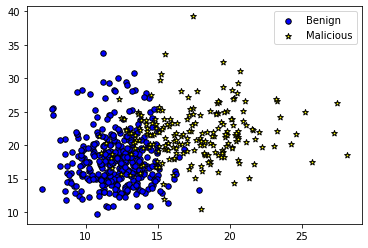

In [11]:
ax = plt.subplot()

## 0/Not admitted
data0 = data.query('label == "B"')
ax.scatter(data0['radius_mean'], data0['texture_mean'], s=30, color="blue", ec="k", label="Benign")

## 1/admitted
data1 = data.query('label == "M"')
ax.scatter(data1['radius_mean'], data1['texture_mean'], color="yellow", marker='*', ec='k', label="Malicious")

plt.legend()
plt.show()

## 課題1. Compute cost function

### ※YOUR CODE IS HERE

In [12]:
X = data[['radius_mean']].values
y = data['label'].replace({'B':0, 'M':1}).values

m, n= X.shape

X_ = (np.c_[np.ones(m), X])
y_ = y.reshape(m, 1)

theta = np.zeros((n+1, 1))

J, grad= lrCostFunction(X_, y_, theta)
print('Testing cost function: %.2f' % J)

Testing cost function: 0.69


Your cost function will be below.

```
Testing cost function: 0.69
```

## 課題2. Gradient Descent

### ※YOUR CODE IS HERE

In [13]:
iterations = 1500
alpha = 0.01
theta_min, j_hist = gradientDescent(X_, y_, theta, alpha, iterations)
print('Theta min: \n', theta_min)
print('Cost min: %.3f' % j_hist[-1])

Theta min: 
 [[-1.21313194]
 [ 0.0701134 ]]
Cost min: 0.591


### Discussion

- 以下のコードを実行してその結果をもたらした原因について考察しよう

In [14]:
def predict(X, theta):
    yhat = sigmoid(np.dot(X, theta))
    return np.where(yhat > 0.5, 1, 0)
    
y_predict = predict(X_, theta_min)
n_hits = (y == y_predict[0]).sum()
print("Accuracy: %d / %d = %.1f[%%]" % (n_hits, m, n_hits/m*100))

Accuracy: 212 / 569 = 37.3[%]


In [15]:
print("Positive count: %d" % (y == 1).sum())
print("Negative count: %d" % (y == 0).sum())

Positive count: 212
Negative count: 357


- このモデルがやっていることは「全て陰性である」という判断を下しているだけに過ぎない
- こんなモデルに果たして意味があるのだろうか？

## 課題3. Newton optimization（Optional）

### ※YOUR CODE IS HERE

In [16]:
theta = np.zeros(n+1)
Xtil = np.c_[np.ones(m), X]
theta_min, J_min = newtonOptimize(Xtil, y, theta, max_iter=150)
print('Theta min: \n', theta_min)
print('Cost min: %.3f' % J_min)

Theta min: 
 [-15.24587078   1.03358882]
Cost min: 0.290


In [17]:
y_predict = predict(Xtil, theta_min)
n_hits = (y == y_predict).sum()
print("Accuracy: %d / %d = %.1f[%%]" % (n_hits, m, n_hits/m*100))

Accuracy: 500 / 569 = 87.9[%]


### ※END, 一旦chapter02に戻る

## 課題4. Gradient descent with feature normalize

In [18]:
X_norm = featureNormalize(X)
X_ = (np.c_[np.ones(m), X_norm])

In [19]:
m = len(X)
theta = np.zeros((n+1, 1))
iterations = 1500
alpha = 0.01
theta_min, j_hist = gradientDescent(X_, y_, theta, alpha, iterations)
print('Theta min: \n', theta_min)
print('Cost min: %.3f' % j_hist[-1])

Theta min: 
 [[-0.56630289]
 [ 1.93763591]]
Cost min: 0.328


In [20]:
y_predict = predict(X_, theta_min)
n_hits = (y == y_predict.ravel()).sum()
print("Accuracy: %d / %d = %.1f[%%]" % (n_hits, m, n_hits/m*100))

Accuracy: 502 / 569 = 88.2[%]


- まともになってきたのでは？

## 課題5. Newton Optimize with feature normalize

In [21]:
theta = np.zeros(n+1)
X_norm = featureNormalize(X)
Xtil = np.c_[np.ones(m), X_norm]
theta_min, J_min = newtonOptimize(Xtil, y, theta, max_iter=150)
print('Theta min: \n', theta_min)
print('Cost min: %.3f' % J_min)

Theta min: 
 [-0.64405995  3.64241747]
Cost min: 0.290


In [22]:
y_predict = predict(Xtil, theta_min)
n_hits = (y == y_predict).sum()
print("Accuracy: %d / %d = %.1f[%%]" % (n_hits, m, n_hits/m*100))

Accuracy: 500 / 569 = 87.9[%]


- 多少なりとも結果がロバストになってきた？

## 課題6. Advanced Optimize

In [25]:
from scipy.optimize import minimize

def lrCostFunctionOpt(theta, X, y):
    m = X.shape[0]
    h = sigmoid(np.dot(X, theta))
    return 1/m*(-np.sum(y*np.log(h) + (1-y)*(np.log(1-h))))

theta = np.zeros(n+1)
X_norm = featureNormalize(X)
Xtil = np.c_[np.ones(m), X_norm]

theta_min = minimize(lrCostFunctionOpt, theta, args=(Xtil, y)).x

ModuleNotFoundError: No module named 'scipy'

In [26]:
y_predict = predict(Xtil, theta_min)
n_hits = (y == y_predict).sum()
print("Accuracy: %d / %d = %.1f[%%]" % (n_hits, m, n_hits/m*100))

Accuracy: 500 / 569 = 87.9[%]


# Multi variables

In [27]:
X = data[['radius_mean', 'texture_mean']].values
y = data['label'].replace({'B':0, 'M':1}).values

m, n = X.shape

X_ = np.c_[np.ones(m), X]
y_ = y.reshape(m, 1)

theta = np.zeros((n+1, 1))

## Gradient Descent with multi variables

In [28]:
X = featureNormalize(X)
X_ = np.hstack((np.ones((len(X), 1)), X))
theta = np.zeros((3, 1))
iterations = 1500
alpha = 0.01
theta_min, j_hist = gradientDescent(X_, y_, theta, alpha, iterations)
print('Theta min: \n', theta_min)
print('Cost min: %.3f' % j_hist[-1])

Theta min: 
 [[-0.14950953]
 [ 1.85694013]
 [ 0.76557197]]
Cost min: 0.328


In [29]:
y_predict = predict(X_, theta_min)
n_hits = (y == y_predict.ravel()).sum()
print("Accuracy: %d / %d = %.1f[%%]" % (n_hits, m, n_hits/m*100))

Accuracy: 492 / 569 = 86.5[%]


## Newton Optimize with multi variables

In [30]:
theta = np.zeros(n+1)
X_norm = featureNormalize(X)
Xtil = np.c_[np.ones(m), X_norm]
theta_min, J_min = newtonOptimize(Xtil, y, theta, max_iter=150)
print('Theta min: \n', theta_min)
print('Cost min: %.3f' % J_min)

Theta min: 
 [1.45794027 4.97103861 1.02581164]
Cost min: 0.256


In [31]:
y_predict = predict(Xtil, theta_min)
n_hits = (y == y_predict).sum()
print("Accuracy: %d / %d = %.1f[%%]" % (n_hits, m, n_hits/m*100))

Accuracy: 507 / 569 = 89.1[%]


## Advanced Optimize

In [32]:
theta = np.zeros(n+1)
X_norm = featureNormalize(X)
Xtil = np.c_[np.ones(m), X_norm]
theta_min = minimize(lrCostFunctionOpt, theta, args=(Xtil, y)).x

NameError: name 'minimize' is not defined

In [33]:
y_predict = predict(Xtil, theta_min)
n_hits = (y == y_predict).sum()
print("Accuracy: %d / %d = %.1f[%%]" % (n_hits, m, n_hits/m*100))

Accuracy: 507 / 569 = 89.1[%]
